In [1]:
import os
import astroNN
from astroNN import datasets
from astroNN.apogee import allstar, visit_spectra, combined_spectra, gap_delete, apogee_continuum, bitmask_boolean
from astroNN.models import load_folder
from astroNN.apogee.chips import wavelength_solution, chips_split

from astropy.io import fits
from astropy.wcs import WCS
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
import traceback

%matplotlib inline
import matplotlib.ticker as ticker

2023-05-30 22:17:54.615723: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 22:17:54.692494: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 22:17:54.693632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 22:17:56.177759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
f = open("/geir_data/scr/petershi/serialized/spec_diff_arr.pkl", "rb")

diff = pickle.load(f)

In [3]:
diff.keys()

dict_keys(['blue diff', 'red diff', 'green diff'])

In [4]:
len(diff["red diff"])

26714

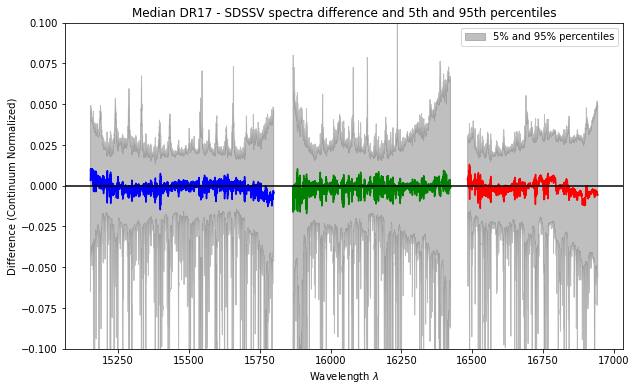

In [5]:
rd = diff["red diff"]
gd = diff["green diff"]
bd = diff["blue diff"]

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=17)

plt.figure(figsize = (10, 6))

# median 

plt.plot(lambda_blue, np.median(bd, axis = 0), c = "blue")
plt.plot(lambda_red, np.median(rd, axis = 0), c = "red")
plt.plot(lambda_green, np.median(gd, axis = 0), c = "green")
plt.title("Median DR17 - SDSSV spectra difference and 5th and 95th percentiles")

# mean

# plt.plot(lambda_blue, np.mean(bd, axis = 0), c = "blue", linestyle = "dashed")
# plt.plot(lambda_red, np.mean(rd, axis = 0), c = "red", linestyle = "dashed")
# plt.plot(lambda_green, np.mean(gd, axis = 0), c = "green", linestyle = "dashed")
# plt.title("Mean DR17 - SDSSV spectra difference and 5th and 95th percentiles")

plt.fill_between(lambda_blue, np.percentile(bd, 5, axis=0), np.percentile(bd, 95, axis=0), alpha=0.5, label='5% and 95% percentiles', color = "grey")
plt.fill_between(lambda_red, np.percentile(rd, 5, axis=0), np.percentile(rd, 95, axis=0), alpha=0.5, color = "grey")
plt.fill_between(lambda_green, np.percentile(gd, 5, axis=0), np.percentile(gd, 95, axis=0), alpha=0.5, color = "grey")

plt.axhline(y=0, color='black')

plt.xlabel(r'Wavelength $\lambda$')
plt.ylabel('Difference (Continuum Normalized)')
plt.ylim(-0.1, 0.1)
plt.legend()
plt.show()

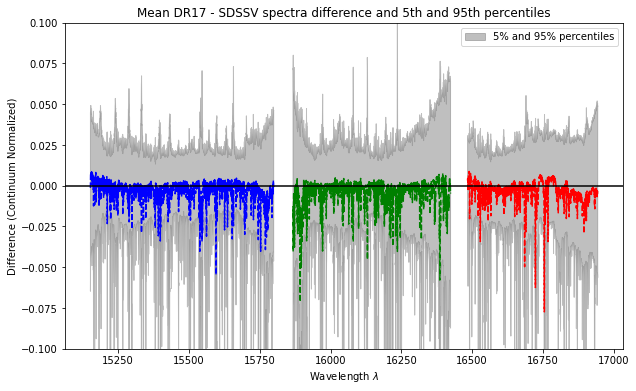

In [6]:
plt.figure(figsize = (10, 6))

# median 

# plt.plot(lambda_blue, np.median(bd, axis = 0), c = "blue")
# plt.plot(lambda_red, np.median(rd, axis = 0), c = "red")
# plt.plot(lambda_green, np.median(gd, axis = 0), c = "green")
# plt.title("Median DR17 - SDSSV spectra difference and 5th and 95th percentiles")

# mean

plt.plot(lambda_blue, np.mean(bd, axis = 0), c = "blue", linestyle = "dashed")
plt.plot(lambda_red, np.mean(rd, axis = 0), c = "red", linestyle = "dashed")
plt.plot(lambda_green, np.mean(gd, axis = 0), c = "green", linestyle = "dashed")
plt.title("Mean DR17 - SDSSV spectra difference and 5th and 95th percentiles")

plt.fill_between(lambda_blue, np.percentile(bd, 5, axis=0), np.percentile(bd, 95, axis=0), alpha=0.5, label='5% and 95% percentiles', color = "grey")
plt.fill_between(lambda_red, np.percentile(rd, 5, axis=0), np.percentile(rd, 95, axis=0), alpha=0.5, color = "grey")
plt.fill_between(lambda_green, np.percentile(gd, 5, axis=0), np.percentile(gd, 95, axis=0), alpha=0.5, color = "grey")

plt.axhline(y=0, color='black')

plt.xlabel(r'Wavelength $\lambda$')
plt.ylabel('Difference (Continuum Normalized)')
plt.ylim(-0.1, 0.1)
plt.legend()
plt.show()